1. Analyze
2. Preprocess data
3. Feature Engineering
4. Build Model Pipeline
5. Measure performance of the model.
6. Which metric is your main metric for this problem and why? What is your main model as well as their params and why? Your comment


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. Data Analysis is correct or make sense
4. The data preprocessing is correct or make sense
5. The Feature engineering is correct or make sense
6. Model pipeline
7. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv("credit_fraud.csv")
original_clusters = df["TARGET"]
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [105]:
# Count the total occurrences of 0 and 1 in original_clusters
occurrences = original_clusters.value_counts()

# Print the counts
print("Total occurrences of 0:", occurrences[0])
print("Total occurrences of 1:", occurrences[1])

Total occurrences of 0: 24712
Total occurrences of 1: 422


Từ kết quả trên, có thể thấy dataset đang gặp tình trạng imbalanced => cần xử lý vấn đề này.

In [106]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['TARGET']==0)] 
df_minority = df[(df['TARGET']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 24712, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df = pd.concat([df_minority_upsampled, df_majority])

In [107]:
original_clusters = df["TARGET"]
# Count the total occurrences of 0 and 1 in original_clusters
occurrences = original_clusters.value_counts()

# Print the counts
print("Total occurrences of 0:", occurrences[0])
print("Total occurrences of 1:", occurrences[1])

Total occurrences of 0: 24712
Total occurrences of 1: 24712


In [108]:
df = df.iloc[:, 1:-1]

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49424 entries, 17370 to 24890
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              49424 non-null  int64  
 1   GENDER          49424 non-null  object 
 2   CAR             49424 non-null  object 
 3   REALITY         49424 non-null  object 
 4   NO_OF_CHILD     49424 non-null  int64  
 5   INCOME          49424 non-null  float64
 6   INCOME_TYPE     49424 non-null  object 
 7   EDUCATION_TYPE  49424 non-null  object 
 8   FAMILY_TYPE     49424 non-null  object 
 9   HOUSE_TYPE      49424 non-null  object 
 10  FLAG_MOBIL      49424 non-null  int64  
 11  WORK_PHONE      49424 non-null  int64  
 12  PHONE           49424 non-null  int64  
 13  E_MAIL          49424 non-null  int64  
 14  FAMILY SIZE     49424 non-null  float64
 15  BEGIN_MONTH     49424 non-null  int64  
 16  AGE             49424 non-null  int64  
 17  YEARS_EMPLOYED  49424 non-null  

In [110]:
df.describe()

,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
count,4.942400e+04,49424.000000,4.942400e+04,49424.0,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000,49424.000000
mean,5.082140e+06,0.506131,1.972204e+05,1.0,0.283445,0.298195,0.100113,2.271589,29.861424,40.221714,6.396649
std,4.208892e+04,0.786577,1.032345e+05,0.0,0.450675,0.457470,0.300154,0.956085,16.479699,9.564503,5.901096
min,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000
25%,5.046557e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,16.000000,32.000000,2.000000
50%,5.089162e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,30.000000,40.000000,5.000000
75%,5.117134e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,43.000000,48.000000,9.000000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000


## Data Analysis

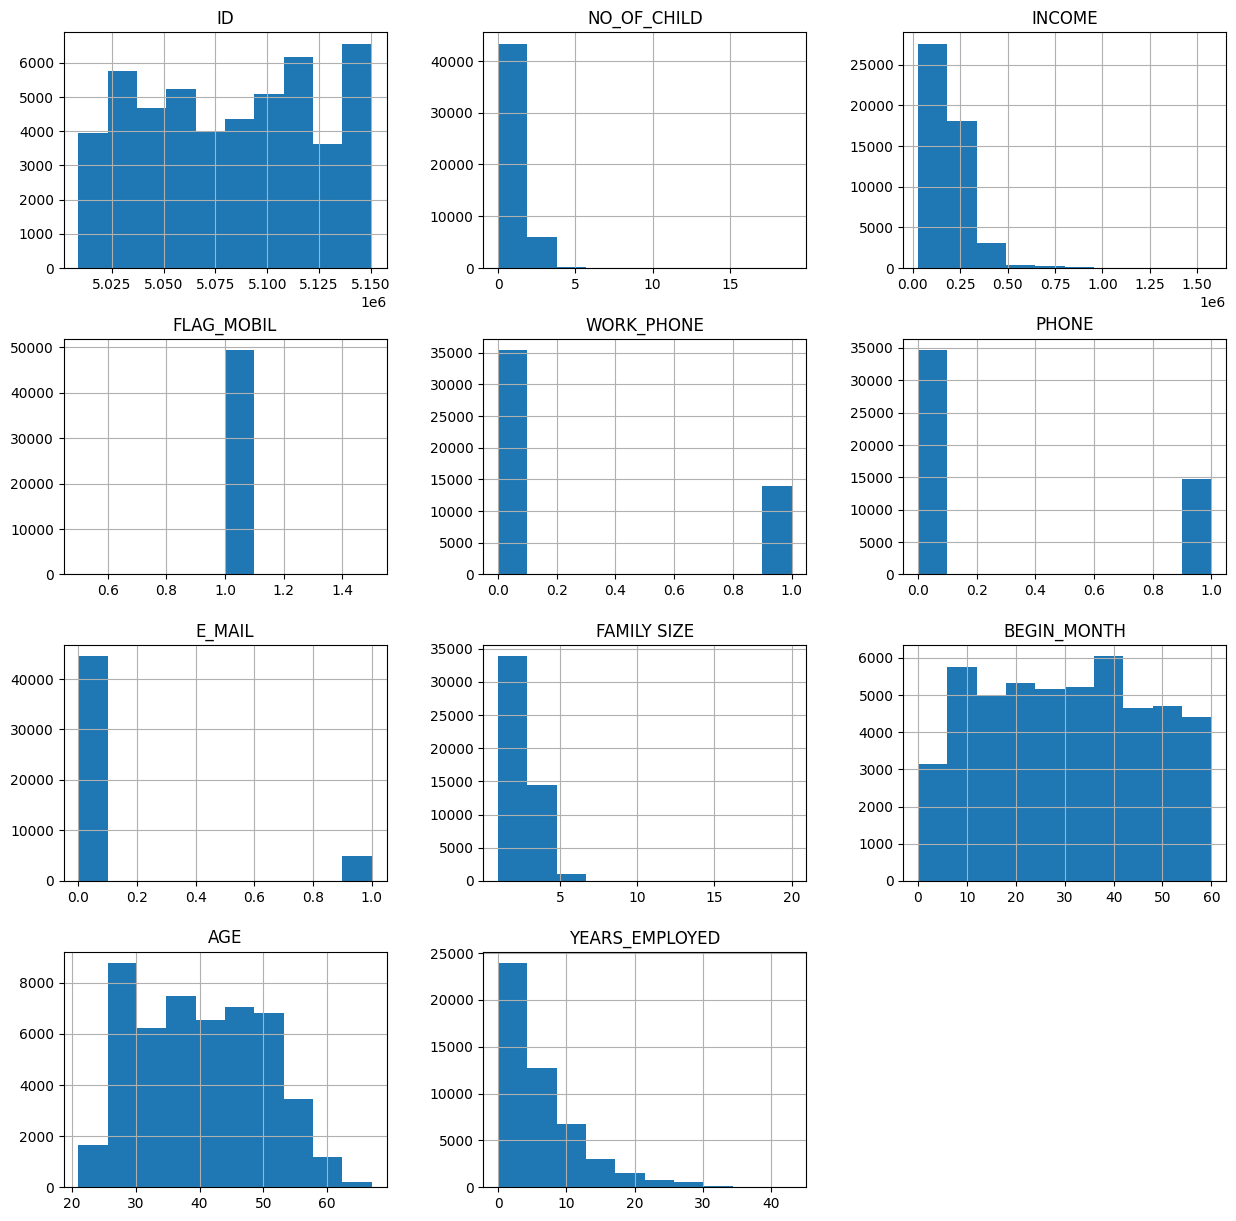

In [111]:
df.hist(figsize=(15, 15))
plt.show()

In [112]:
cat_cols = [col for col in df.columns if df[col].dtypes=="O"]

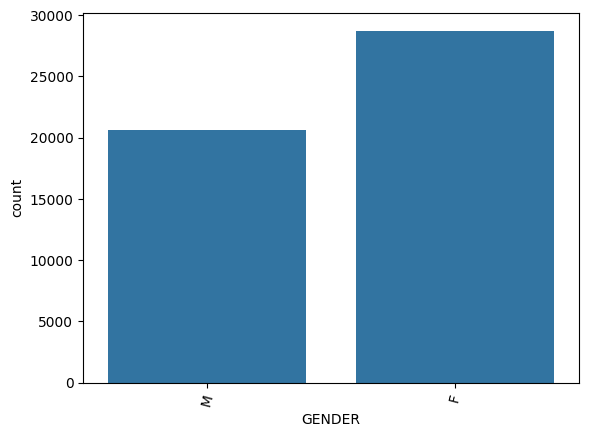

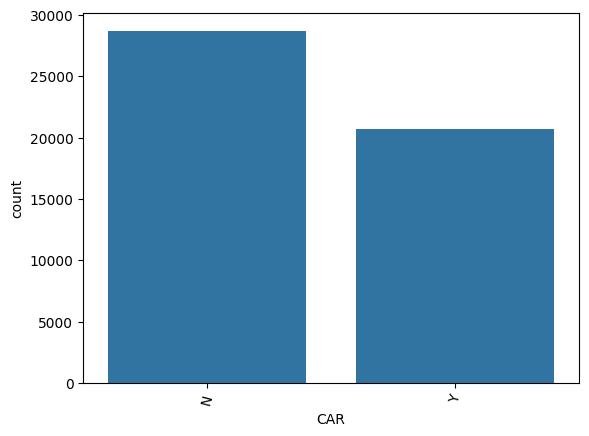

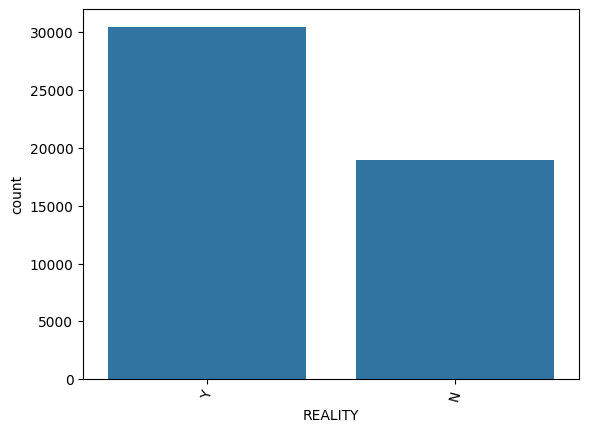

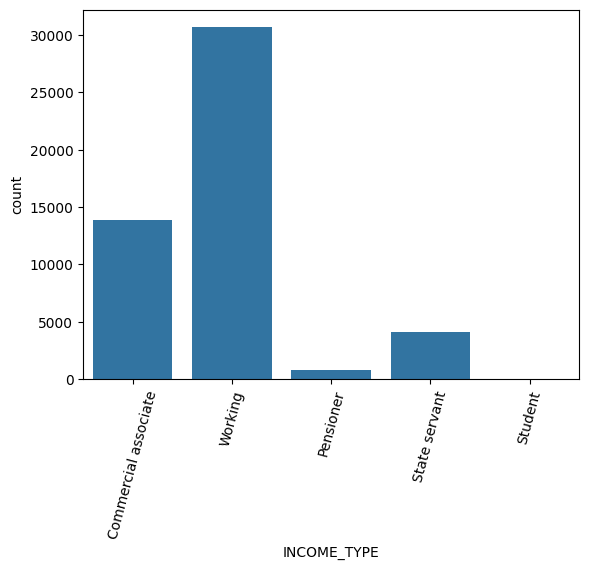

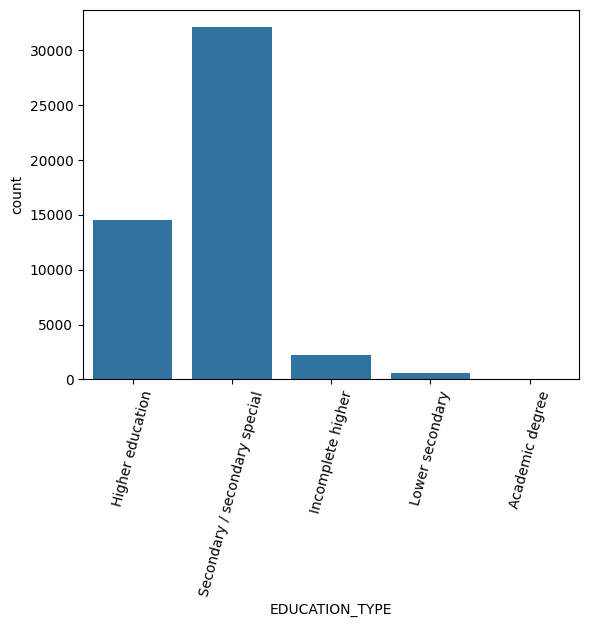

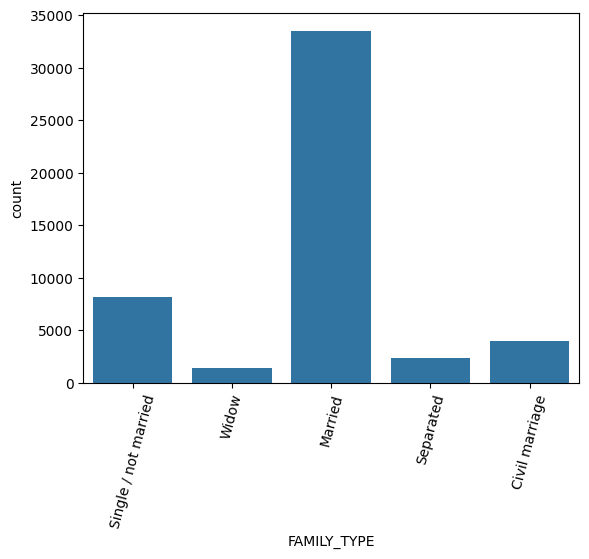

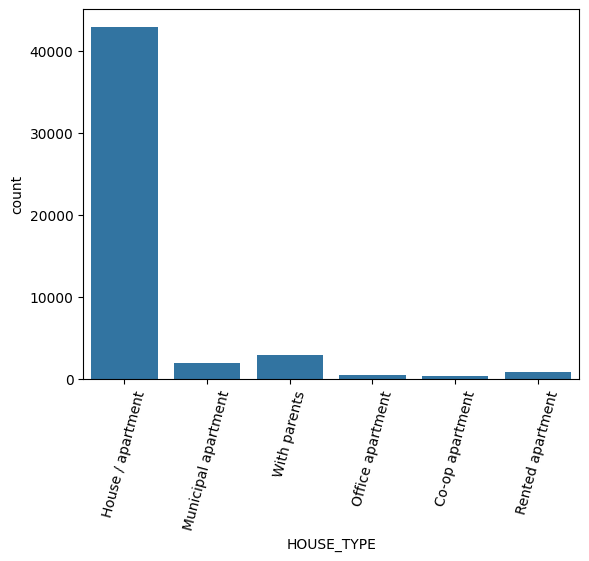

In [113]:
for col in cat_cols: 
    sns.countplot(x=col, data=df) 
    plt.xticks(rotation=75) 
    plt.show()

## Preprocessing

In [114]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
dtype: int64


In [115]:
# Check for any other problems (e.g., duplicate rows)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 24290


## Feature Engineering

In [116]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
    

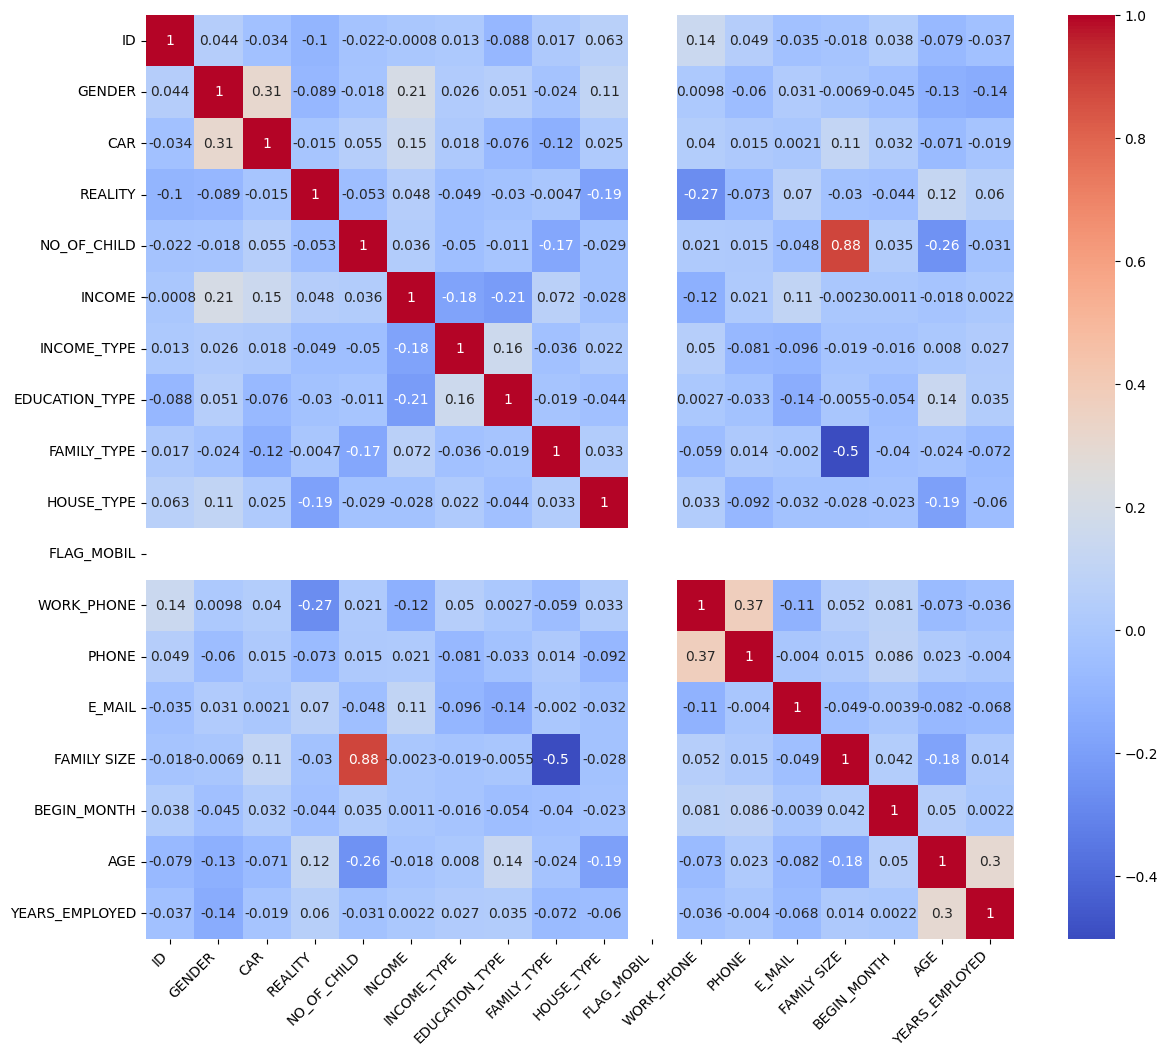

In [117]:
# Heatmap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def apply_feature_engineering(data):
    encoder = LabelEncoder()
    for col in cat_cols:
        data[col] = encoder.fit_transform(data[col])
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.values)
    return pd.DataFrame(scaled_data, columns=data.columns), scaled_data 

data = df.copy()
data1, data  = apply_feature_engineering(data)
corr_matrix = data1.corr()
plt.figure(figsize=(14, 12))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [118]:
X = data
y = original_clusters

# Apply machine learning model

## Train-test split

In [119]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 10
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [120]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Apply random undersampling to the training data
smote = SMOTE(random_state=100)
trainX, trainY = smote.fit_resample(trainX, trainY)

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a trained model
    """
    # Create a pipeline with StandardScaler and SVC
    pipe_line = make_pipeline(StandardScaler(), SVC())
    
    # Fit the pipeline with the training data
    pipe_line.fit(X, y)
    
    return pipe_line

def calculate_performance(y_true, y_pred):
    """
    Calculate performance metrics based on true and predicted labels
    :param y_true: true labels
    :param y_pred: predicted labels
    :return: classification report
    """
    # Generate and return the classification report
    return classification_report(y_true, y_pred)

# Assuming trainX, trainY, testX, testY are defined elsewhere in your code
model = build_model(trainX, trainY)

# Predict on the test dataset
pred = model.predict(testX)

# Calculate and print performance
performance_report = calculate_performance(testY, pred)
print(performance_report)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94      4977
           1       0.89      1.00      0.94      4908

    accuracy                           0.94      9885
   macro avg       0.95      0.94      0.94      9885
weighted avg       0.95      0.94      0.94      9885



In [121]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a trained model
    """
    # Create a pipeline with StandardScaler and SVC
    pipe_line = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(2, ), activation="logistic", learning_rate="adaptive", batch_size=32, max_iter=200))
    
    # Fit the pipeline with the training data
    pipe_line.fit(X, y)
    
    return pipe_line

def calculate_performance(y_true, y_pred):
    """
    Calculate performance metrics based on true and predicted labels
    :param y_true: true labels
    :param y_pred: predicted labels
    :return: classification report
    """
    # Generate and return the classification report
    return classification_report(y_true, y_pred)

# Assuming trainX, trainY, testX, testY are defined elsewhere in your code
model = build_model(trainX, trainY)

# Predict on the test dataset
pred = model.predict(testX)

# Calculate and print performance
performance_report = calculate_performance(testY, pred)
print(performance_report)


              precision    recall  f1-score   support

           0       0.72      0.50      0.59      4977
           1       0.61      0.80      0.69      4908

    accuracy                           0.65      9885
   macro avg       0.67      0.65      0.64      9885
weighted avg       0.67      0.65      0.64      9885



In [122]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "6. " \
           "Other conclusion: "